In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.colors as colors

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data","clinicaltrial_data.csv")
clinical_trial_data_to_load = os.path.join("data","mouse_drug_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.DataFrame(pd.read_csv(mouse_drug_data_to_load))
trial_data = pd.DataFrame(pd.read_csv(clinical_trial_data_to_load))
mouse_data.head()

# Combine the data into a single dataset
data = (pd.merge(trial_data,mouse_data,how='inner'))
data.head()

# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
MeanTumorVolume = pd.DataFrame(data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index())
MeanTumorVolume.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
TumorStandError = pd.DataFrame(data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index())
TumorStandError.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
gpivot = MeanTumorVolume.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
gpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
MeanTumorVolume["Color"] = ""

In [6]:
colordata  = pd.DataFrame(MeanTumorVolume[['Color','Drug']])
colorlist = colordata.drop_duplicates(["Drug"])
for x, colors in colorlist.iterrows():
    x = np.random.choice(range(256))
    colors[0] = x
pd.DataFrame(colorlist)
colorlist

,Color,Drug
0,87,Capomulin
10,117,Ceftamin
20,82,Infubinol
30,229,Ketapril
40,155,Naftisol
50,228,Placebo
60,222,Propriva
70,164,Ramicane
80,93,Stelasyn
90,67,Zoniferol


In [7]:
colorlist_merged = pd.merge(TumorStandError,colorlist)
colorlist_merged = colorlist_merged["Color"]

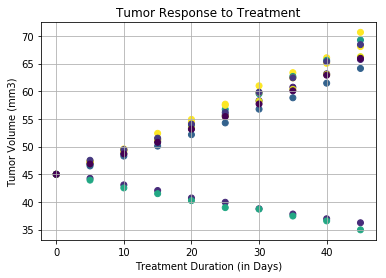

In [8]:
randco = np.random.choice(range(256))
plt.scatter(MeanTumorVolume['Timepoint'],\
            MeanTumorVolume['Tumor Volume (mm3)'],\
           c = colorlist_merged)
#plt.errorbar(MeanTumorVolume['Timepoint'],MeanTumorVolume['Tumor Volume (mm3)'],MeanTumorVolume['Tumor Volume (mm3)'].std(),elinewidth=0)
plt.xlabel('Treatment Duration (in Days)')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid(True)
plt.show()


In [9]:
MetastaticMean = pd.DataFrame(data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean())
MetastaticMean.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16

In [10]:
MetaStandError = pd.DataFrame(data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index())
MetaStandError.head(2)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833


In [11]:
MetaPivot = MetaStandError.pivot(index ='Timepoint',\
                                 columns = 'Drug',\
                                 values = 'Metastatic Sites')
MetaPivot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


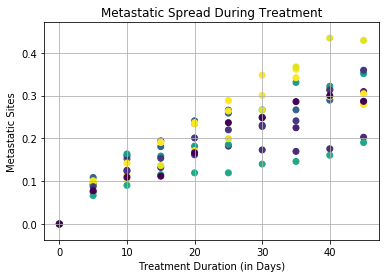

In [12]:
plt.scatter(MetaStandError['Timepoint'],\
            MetaStandError['Metastatic Sites'],\
           c = colorlist_merged)

plt.xlabel('Treatment Duration (in Days)')
plt.ylabel('Metastatic Sites')
plt.title("Metastatic Spread During Treatment")
plt.grid(True)
plt.show()

In [13]:
MouseCount = pd.DataFrame(data.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index())
MouseCount.head(2)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25


In [14]:
MouseCountPivot = MouseCount.pivot(index = 'Timepoint',columns = 'Drug', values = 'Mouse ID')
MouseLifePivot = MouseCountPivot.div(MouseCountPivot.iloc[0])
MouseLifePivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,0.961538,1.00,0.961538,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.884615,0.96,0.884615,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.653846,0.96,0.884615,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.653846,0.92,0.807692,0.68


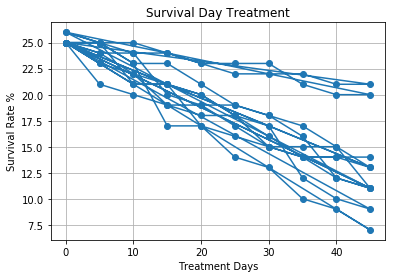

In [22]:
plt.plot(MouseCount['Timepoint'],\
            MouseCount['Mouse ID'],\
           linestyle = '-', marker = 'o')

plt.xlabel('Treatment Days')
plt.ylabel('Survival Rate %')
plt.title("Survival Day Treatment")
plt.grid(True)
plt.show()